In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn.linear_model import LinearRegression

## Задача 1
_Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks)_:  
> zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
> ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

_Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без._

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. Использем формулы:

In [3]:
b1 = ((zp * ks).mean() - (zp).mean() * (ks).mean()) / ((zp ** 2).mean() - zp.mean() ** 2)
print(f'Коэффициент b1: {b1}')

Коэффициент b1: 2.620538882402765


In [4]:
b1 * zp

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

In [5]:
b0 = ks.mean() - b1 * zp.mean()
print(f'Коэффициент b0: {b0}')

Коэффициент b0: 444.1773573243596


In [6]:
y_pred = b0 + b1 * zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

2. Используем матричный метод:

In [7]:
x = zp.reshape(-1, 1)
print(f'x: {x}')

x: [[ 35]
 [ 45]
 [190]
 [200]
 [ 40]
 [ 70]
 [ 54]
 [150]
 [120]
 [110]]


In [8]:
y = ks.reshape(-1, 1)
print(f'y: {y}')

y: [[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]


In [9]:
b_1 = (np.linalg.inv(x.T @ x) @ x.T @ y)[0,0]
print(f'b1: {b_1}')

b1: 5.889820420132689


In [10]:
x1 = np.hstack((np.ones([10, 1]), x))
print(f'x1: {x1}')

x1: [[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]


In [11]:
b_1_0 =(np.linalg.inv(x1.T @ x1) @ x1.T @ y)
print(f'b1_0: {b_1_0[0,0],b_1_0[1,0]}')

b1_0: (444.1773573243596, 2.6205388824027636)


3. Отобразим результаты на графике:

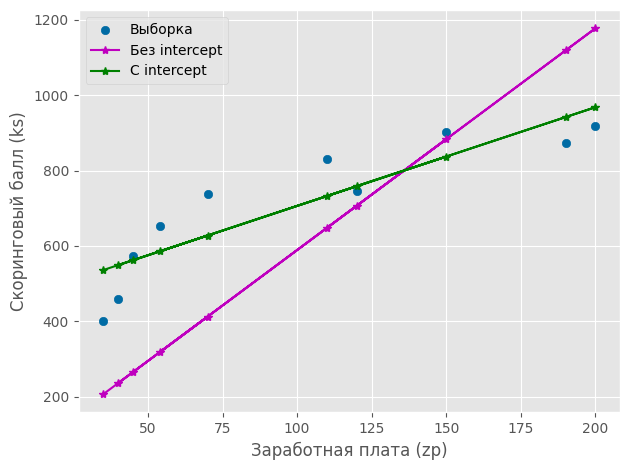

In [18]:
plt.style.use(['tableau-colorblind10'])
plt.scatter(zp, ks, label='Выборка')
plt.xlabel("Заработная плата (zp)")
plt.ylabel("Cкоринговый балл (ks)")
plt.plot(x, b_1*zp, 'm*-', label = 'Без intercept')
plt.plot(x, b_1_0[0,0] + b_1_0[1,0] * zp, "g*-", label = 'C intercept')
plt.tight_layout()
plt.legend()
plt.show()


## Задача 2

_Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)._

In [29]:
def mse_(b1, x=zp, y=ks, n=zp.shape[0]):
    return ((b1 * x - y) ** 2).sum() / n

n = zp.shape[0]
alpha = 1e-6
B1 = 0.1
for i in range(3000):
    B1 -= alpha * 2 / n * ((B1 * x - y ) * x).sum()
    if not i % 500:
        print(f'Итерация = {i}, b1 = {B1}, mse = {mse_(B1)}')

Итерация = 0, b1 = 0.25952808, mse = 493237.7212546963
Итерация = 500, b1 = 5.889815595583751, mse = 56516.858416040064
Итерация = 1000, b1 = 5.8898204201285544, mse = 56516.85841571941
Итерация = 1500, b1 = 5.889820420132673, mse = 56516.85841571943
Итерация = 2000, b1 = 5.889820420132673, mse = 56516.85841571943
Итерация = 2500, b1 = 5.889820420132673, mse = 56516.85841571943


In [22]:
mse_(5.88982)

56516.85841572182

In [31]:
print(f'b1: {B1}')

b1: 5.889820420132673


## Задача 3

_Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)._

1. Найдем производные

In [23]:
beta0, beta1, xi, yi, nn = sym.symbols('beta_0, beta_1, x, y, n')
SSE = ((yi - (beta0 + beta1 * xi)) ** 2)/nn

SSE

(-beta_0 - beta_1*x + y)**2/n

In [24]:
sym.diff(SSE,beta1)

-2*x*(-beta_0 - beta_1*x + y)/n

In [25]:
sym.diff(SSE,beta0)

(2*beta_0 + 2*beta_1*x - 2*y)/n

In [26]:
x, y = zp, ks
b0, b1 = 400, 0.1
n = x.shape[0]
lr = 1e-5
epochs = 6000000

for epoch in range(epochs +1):
    cost_b0 = 2 /n * (b0 + b1 * x - y).sum()
    cost_b1 = -2 / n * ((y - b0 - b1*x)*x).sum()
    b0 = b0 - lr * cost_b0
    b1 = b1 - lr * cost_b1


    if not epoch % 1000000:
        print(f'Итерация = {epoch}, b0 = {b0}, b1 = {b1}')

Итерация = 0, b0 = 400.0059952, b1 = 0.8840808000000001
Итерация = 1000000, b0 = 443.900790592795, b1 = 2.6225745358242567
Итерация = 2000000, b0 = 444.1756250834458, b1 = 2.6205516324617584
Итерация = 3000000, b0 = 444.177346474686, b1 = 2.62053896226116
Итерация = 4000000, b0 = 444.1773572562525, b1 = 2.6205388829040634
Итерация = 5000000, b0 = 444.17735731875723, b1 = 2.6205388824440012
Итерация = 6000000, b0 = 444.17735731875723, b1 = 2.6205388824440012


In [27]:
print(f'b0 = {b0}, b1 = {b1}')

b0 = 444.17735731875723, b1 = 2.6205388824440012
